In [1]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
# Set database connection parameters
DB_NAME = 'linkedin_scraper'
DB_USER = 'postgres'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_PASSWORD = os.getenv('DB_PASSWORD')  # Only the password is stored in env variables

# Establish the connection to PostgreSQL
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

# Load the data into a DataFrame
query = "SELECT * FROM linkedin_posts;"
posts_df = pd.read_sql(query, conn)

# Display the structure of the DataFrame
print(posts_df.info())
posts_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           0 non-null      object
 1   profile_url  0 non-null      object
 2   content      0 non-null      object
 3   date         0 non-null      object
 4   media_type   0 non-null      object
 5   likes        0 non-null      object
 6   comments     0 non-null      object
dtypes: object(7)
memory usage: 132.0+ bytes
None


/tmp/ipykernel_22085/3391384573.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  posts_df = pd.read_sql(query, conn)


,id,profile_url,content,date,media_type,likes,comments


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average monthly posting frequency
posts_df['date'] = pd.to_datetime(posts_df['date'])
posts_df['month'] = posts_df['date'].dt.to_period('M')
monthly_posting_frequency = posts_df.groupby(['profile_url', 'month']).size().groupby('profile_url').mean()
average_monthly_frequency = monthly_posting_frequency.mean()
print(f"Average Monthly Posting Frequency: {average_monthly_frequency:.2f} posts per month")

# Calculate average post length
posts_df['post_length'] = posts_df['content'].apply(lambda x: len(x.split()) if x else 0)
average_post_length = posts_df['post_length'].mean()
print(f"Average Post Length: {average_post_length:.2f} words")

# Average number of likes per media type
likes_by_media = posts_df.groupby('media_type')['likes'].mean()
print("Average Likes by Media Type:")
print(likes_by_media)

# Average number of comments per media type
comments_by_media = posts_df.groupby('media_type')['comments'].mean()
print("Average Comments by Media Type:")
print(comments_by_media)

# Additional Insight: Median engagement (likes + comments) by media type
posts_df['total_engagement'] = posts_df['likes'] + posts_df['comments']
median_engagement_by_media = posts_df.groupby('media_type')['total_engagement'].median()
print("Median Engagement by Media Type:")
print(median_engagement_by_media)


Average Monthly Posting Frequency: nan posts per month
Average Post Length: nan words
Average Likes by Media Type:
Series([], Name: likes, dtype: object)
Average Comments by Media Type:
Series([], Name: comments, dtype: object)
Median Engagement by Media Type:
Series([], Name: total_engagement, dtype: object)


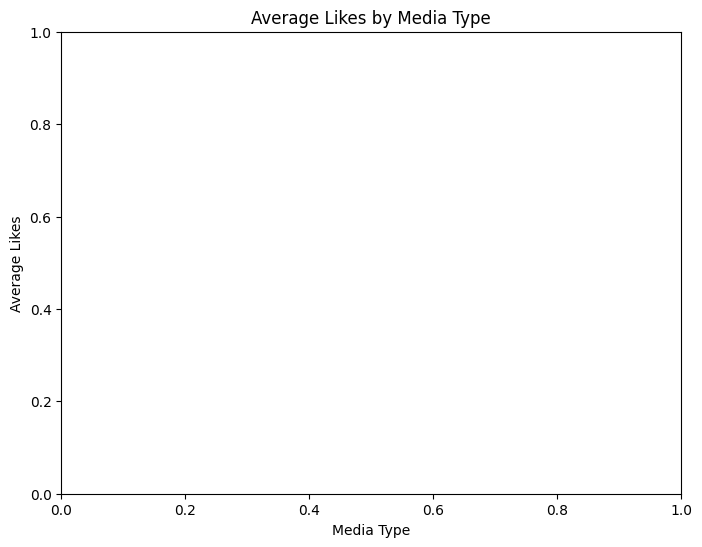

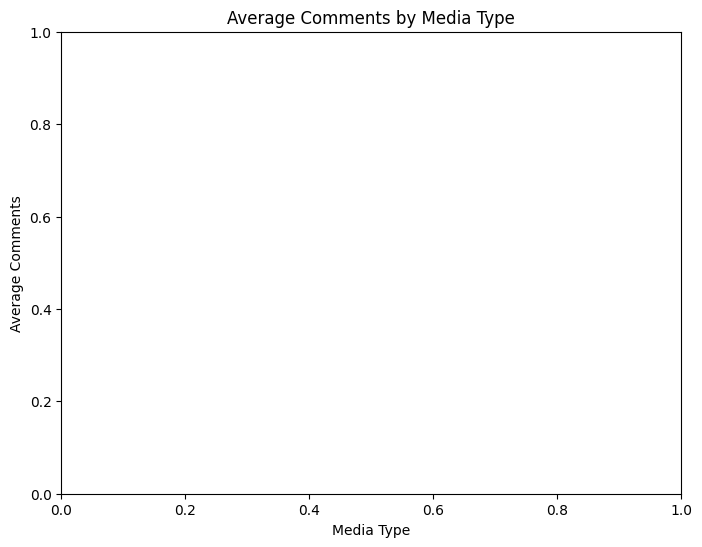

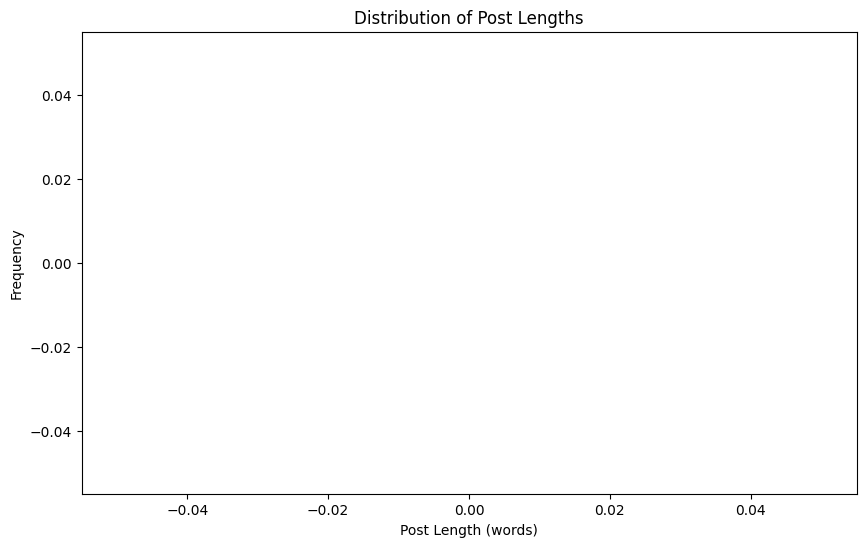

In [3]:
# Plot average likes by media type
plt.figure(figsize=(8, 6))
sns.barplot(x=likes_by_media.index, y=likes_by_media.values)
plt.title("Average Likes by Media Type")
plt.xlabel("Media Type")
plt.ylabel("Average Likes")
plt.show()

# Plot average comments by media type
plt.figure(figsize=(8, 6))
sns.barplot(x=comments_by_media.index, y=comments_by_media.values)
plt.title("Average Comments by Media Type")
plt.xlabel("Media Type")
plt.ylabel("Average Comments")
plt.show()

# Plot distribution of post lengths
plt.figure(figsize=(10, 6))
sns.histplot(posts_df['post_length'], bins=30, kde=True)
plt.title("Distribution of Post Lengths")
plt.xlabel("Post Length (words)")
plt.ylabel("Frequency")
plt.show()


In [4]:
conn.close()
